3001
Found 3001 files belonging to 3 classes.
Using 2701 files for training.
Found 3001 files belonging to 3 classes.
Using 300 files for validation.
['fruit_brownspot', 'fruit_healthy', 'fruit_woodiness']
0.0 1.0
0.0 1.0
tf.Tensor(2, shape=(), dtype=int32)
Model: "sequential_66"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_261 (Conv2D)          (None, 511, 511, 32)      416       
_________________________________________________________________
max_pooling2d_261 (MaxPoolin (None, 255, 255, 32)      0         
_________________________________________________________________
conv2d_262 (Conv2D)          (None, 253, 253, 32)      9248      
_________________________________________________________________
max_pooling2d_262 (MaxPoolin (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_263 (Conv2D)          (None, 124, 124, 32)      9248

2021-11-15 21:46:43.646059: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


55/55 [==============================] - ETA: 0s - loss: 0.9813 - accuracy: 0.5046

2021-11-15 21:48:45.196082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


55/55 [==============================] - 126s 2s/step - loss: 0.9813 - accuracy: 0.5046 - val_loss: 0.8099 - val_accuracy: 0.6533
Epoch 2/3
55/55 [==============================] - 117s 2s/step - loss: 0.6442 - accuracy: 0.7153 - val_loss: 0.6960 - val_accuracy: 0.6967
Epoch 3/3
55/55 [==============================] - 117s 2s/step - loss: 0.4610 - accuracy: 0.8153 - val_loss: 0.3652 - val_accuracy: 0.8300


2021-11-15 21:52:44.152146: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


[[ 1.7413317e+00 -4.9158230e-02 -4.6360055e-01]
 [ 2.7043791e+00 -1.8357458e+00  3.3798637e+00]
 [-3.9833568e-02  2.1113238e+00 -4.0524549e+00]
 [-2.1090994e+00 -2.0237186e+00  6.1425867e+00]
 [ 4.6905062e-01 -1.0913907e+00  3.0241451e+00]
 [ 6.9407225e-01  3.0574870e+00 -6.6518641e+00]
 [-1.3994601e+00 -3.6817402e-01  1.2422838e+00]
 [-1.7266595e+00 -1.8541743e+00  5.4966769e+00]
 [ 1.4162307e+00 -2.4072371e+00  5.1409068e+00]
 [ 1.0650299e-01 -1.5942931e+00  3.7710187e+00]
 [-2.7480142e+00  3.5796337e+00 -4.3411608e+00]
 [-4.7133732e+00 -2.7736642e+00  7.4829612e+00]
 [ 2.5789237e+00 -4.8758745e-01 -4.9065772e-01]
 [-1.9428259e+00  1.8776698e+00 -2.1535056e+00]
 [ 8.8279223e-01  2.1006556e+00 -4.9362626e+00]
 [ 3.5468793e+00 -1.7667983e+00  2.4141924e+00]
 [-2.7683749e+00  4.3712835e+00 -6.3179665e+00]
 [-1.8125096e-01 -1.7919985e+00  4.6620917e+00]
 [ 1.3362032e+00  2.1951340e-01 -9.2136079e-01]
 [-1.1089725e+00  3.5944610e+00 -6.2132344e+00]
 [-4.9303225e-01  3.7669053e+00 -6.61362

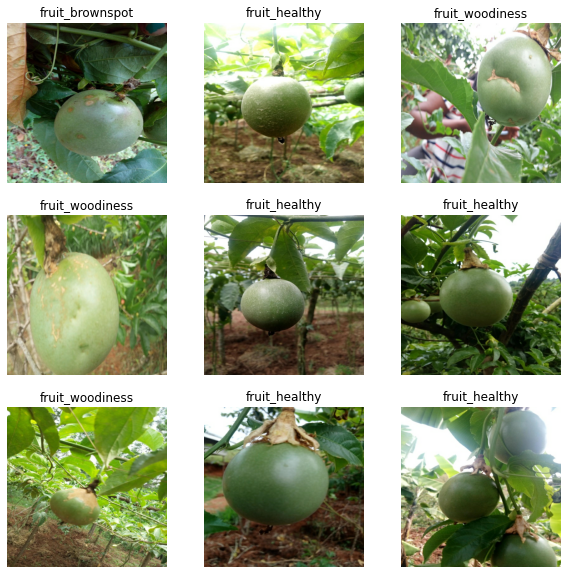

In [73]:
import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import PIL
import PIL.Image
import numpy as np
import pathlib
import pandas as pd
import shutil
import matplotlib.pyplot as plt
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_val_predict


data_dir = "Train_Images"

data_dir = pathlib.Path(data_dir)

image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

imgs = list(data_dir.glob('*healthy/*'))
PIL.Image.open(str(imgs[0]))
#print(str(imgs[0]))

train = pd.read_csv('Train.csv')
#print(str(len(train['Image_ID'])))
# imageNames = []
# imageClass = []
# for i in range(len(train['Image_ID'])):
#     duplicate = False
#     for j in range(len(imageNames)):
#         if str(train['Image_ID'][i]+".jpg") == str(imageNames[j]):
#             duplicate = True
#     if duplicate != True:    
#         imageNames.append(str(train['Image_ID'][i])+".jpg")
#         #print(str(train['Image_ID'][i])+".jpg")
#         imageClass.append(train['class'][i])
#     # print(imageNames[i])
    # print(imageClass[i])
# true = 0
# false = 0
# print(len(imgs))
# print(image_count)
# print(str(imgs[0]))
# for i in range(image_count):
#     for j in range(image_count):
#         if(str("Train_Images/"+imageNames[i]) == str(imgs[j])):
#             true = true + 1

    
# print(str(true)+" Exist\n")
# print(str(true-image_count)+" Do Not Exist\n")          
# count = 0
# for f in imageNames:
#     shutil.move(str("Train_Images/"+f), str("Train_Images/"+imageClass[count]))
#     count = count + 1

batch_size = 50
img_height = 512
img_width = 512

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)




val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.1,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)



class_names = train_ds.class_names
print(class_names)



# for image_batch, labels_batch in train_ds:
#   # print(image_batch.shape)
#   # print(labels_batch.shape)
#   break


normalization_layer = tf.keras.layers.Rescaling(1./255)

normalizedTrain_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalizedTrain_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))


normalizedVal_ds = val_ds.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(normalizedVal_ds))
first_image = image_batch[0]
# Notice the pixel values are now in `[0,1]`.
print(np.min(first_image), np.max(first_image))

testVal = normalizedVal_ds
print(str(labels_batch[0]))

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")



AUTOTUNE = tf.data.AUTOTUNE

# print(normalizedTrain_ds)
# print(normalizedVal_ds)

normalizedTrain_ds = normalizedTrain_ds.shuffle(image_count, reshuffle_each_iteration=True)
normalizedVal_ds = normalizedVal_ds.shuffle(int(image_count*0.15), reshuffle_each_iteration=True)

# print(normalizedTrain_ds)
# print(normalizedVal_ds)

normalizedTrain_ds = normalizedTrain_ds.cache().prefetch(buffer_size=AUTOTUNE)
normalizedVal_ds = normalizedVal_ds.cache().prefetch(buffer_size=AUTOTUNE)

# print(normalizedTrain_ds)
# print(normalizedVal_ds)


num_classes = len(class_names)


model = tf.keras.Sequential([
  tf.keras.layers.Conv2D(32, 2, strides=1, activation='relu', input_shape=(512,512,3)),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(32, 3, strides=1, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(32, 4, strides=1, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Conv2D(16, 3, strides=1, activation='relu'),
  tf.keras.layers.MaxPool2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(num_classes),
  # tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(512,512,3)),
  # tf.keras.layers.MaxPooling2D(),

  # tf.keras.layers.Conv2D(32, 3, activation='relu'),
  # tf.keras.layers.MaxPooling2D(),
  # tf.keras.layers.Conv2D(32, 3, activation='relu'),
  # tf.keras.layers.MaxPooling2D(),

  # tf.keras.layers.Flatten(),
  
  # tf.keras.layers.Dense(128, activation='relu'),
  # tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])
model.summary()


history = model.fit(
  normalizedTrain_ds,
  validation_data=normalizedVal_ds,
  batch_size=50,
  epochs=3,
  use_multiprocessing=True
)

model.save_weights("./",overwrite=True)
# model.load_weights("./weights.index")

prediction = []

for images, labels in testVal:
  prediction = model.predict(images)
  print(prediction)

winners = []
topIndex = 0

for i in range(len(prediction)):
  topIndex = 0
  top = prediction[i][0]
  for j in range(1,2):
    if(top<prediction[i][j]):
      top = prediction[i][j]
      topIndex = j
  
  winners.append(topIndex)
correct = 0
incorrect = 0
predictionStrings = []

for i in range(len(winners)):
  predictionStrings.append(winners[i])
  if winners[i] == labels[i]:
    print("Prediction "+str(i)+": Correct: "+str(class_names[labels[i]]))
    correct = correct + 1
  else:
    print("Prediction "+str(i)+": Inorrect: "+str(class_names[labels[i]]))
    incorrect = incorrect+1

print("Accuracy: "+str((correct/50)*100))

cf = tf.math.confusion_matrix(labels,winners)
print(cf)
# print(history.history)

